#### This notebook is the main notebook to run the recommendations of the procedures based on the lab results and diagnosis

## Load the data

In [9]:
import numpy as np
import pandas as pd


# trin and test output
data_test = pd.read_csv('data_processing/data_test.csv')
data_train = pd.read_csv('data_processing/data_train.csv')

PC_pr_tr = data_train[[data_train.columns[0]]+ list(data_train.columns[314: 375])].sort_values('PC_enc')
PC_pr_ts = data_test[[data_test.columns[0]]+ list(data_test.columns[314: 375])].sort_values('PC_enc')



#df_test = pd.read_csv('data/data_test.csv').sort_values('PC_enc')
SP_pr_tr = data_train[[data_train.columns[0]]+ list(data_train.columns[407:])].sort_values('PC_enc')
SP_pr_ts = data_test[[data_test.columns[0]]+ list(data_test.columns[407:])].sort_values('PC_enc')
print(SP_pr_tr.head())




# Predictions from model 1 and 2

# train set
df_model2_train = pd.read_csv('evaluation/data/CF_AE_pred_train.csv').sort_values('PC_enc')
df_model1_train = pd.read_csv('evaluation/data/Model1_pred_train.csv').sort_values('PC_enc')
#print(df_model1_train.shape)
#print(df_model1_train[0])

df_model2_train = pd.merge(df_model2_train, df_model1_train['PC_enc'], on='PC_enc', how='inner').sort_values('PC_enc')



# test set
df_model2_pred = pd.read_csv('evaluation/data/CF_AE_pred.csv').sort_values('PC_enc')
df_model1_pred = pd.read_csv('evaluation/data/Model1_pred.csv').sort_values('PC_enc')

# privoder information
SP_id_tr = data_train[[data_train.columns[0]]+ list(data_train.columns[377: 407])].sort_values('PC_enc')
SP_id_ts = data_test[[data_test.columns[0]]+ list(data_test.columns[377: 407])].sort_values('PC_enc')

#print(df_model1_train[:10,:])
#print(df_model2_train[:10,:])


train_joined = pd.merge( df_model2_train, df_model1_train, on='PC_enc', how='inner')
X_train = pd.merge( train_joined, SP_id_tr, on='PC_enc', how='inner').to_numpy()[:,1:] # Add prov info

#print(train_joined[:10,:])

#X_train =  pd.merge(SP_id_tr, df_model1_train, on='PC_enc', how='inner').sort_values('PC_enc').to_numpy()[:,1:]


#X_train =  SP_pr_tr.sort_values('PC_enc').to_numpy()[:,1:]
#################################


test_joined = pd.merge( df_model2_pred, df_model1_pred, on='PC_enc', how='inner')
X_test = pd.merge( test_joined, SP_id_ts, on='PC_enc', how='inner').to_numpy()[:,1:] # Add prov info

#X_test =   pd.merge(SP_id_ts , df_model1_pred, on='PC_enc', how='inner').sort_values('PC_enc').to_numpy()[:,1:]



#
#X_test =   SP_pr_ts.sort_values('PC_enc').to_numpy()[:,1:] 


#print(X_train.shape)

#print(X_train[0])
#print(X_test[:10,:])
# Only include model 2 as input
#X_train = df_model1_train.to_numpy()[:,1:]
#X_test = df_model1_pred.to_numpy()[:,1:]


Y_train = SP_pr_tr.sort_values('PC_enc').to_numpy()[:,1:]
Y_test = SP_pr_ts.sort_values('PC_enc').to_numpy()[:,1:]


d = X_train.shape[1]
N_train = X_train.shape[0]

d_out = Y_train.shape[1]
print(X_train.shape)
print(Y_train.shape)

#print(X_train[:10]!=Y_train[:10])
#print(X_test[:10]!=Y_test[:10])

        PC_enc  F0_y_y  F1  F2  F3  F4  F5  F6  F7  F8  ...  F51_y  F52_y  \
4326  16116015       0   0   0   0   0   0   0   0   0  ...      0      0   
1525  16175218       0   0   0   0   0   0   0   0   0  ...      0      0   
5042  16494386       0   0   0   0   0   0   0   0   0  ...      0      0   
5055  16927888       0   0   0   0   0   0   0   0   0  ...      0      0   
2418  17091694       1   0   0   0   1   1   0   0   0  ...      0      0   

      F53_y  F54_y  F55_y  F56_y  F57_y  F58_y  F59_y  F60_y  
4326      0      0      0      0      0      0      0      0  
1525      0      0      0      0      0      0      0      0  
5042      0      0      0      0      0      0      0      0  
5055      0      0      0      0      0      0      0      0  
2418      0      0      0      0      0      0      0      0  

[5 rows x 62 columns]
(5500, 152)
(5500, 61)


In [10]:
## test and debug: REMOVE LATER
print(pd.merge(df_model1_pred, df_model2_pred, on='PC_enc', how='inner').PC_enc.tail(10))
print(SP_pr_ts.PC_enc.tail(10))


1311    131240872227
1312    131240887260
1313    131240890527
1314    131240893153
1315    131240899094
1316    131240966487
1317    131241025125
1318    131241061358
1319    131241077737
1320    131261087497
Name: PC_enc, dtype: int64
907     131240872227
906     131240887260
893     131240890527
870     131240893153
879     131240899094
874     131240966487
889     131241025125
886     131241061358
884     131241077737
1320    131261087497
Name: PC_enc, dtype: int64


#### We'll start simple, with a single fully-connected neural layer as encoder and as decoder

## NN Model

In [11]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model

#input_img = Input(shape=(d,))
#encoded = Dense(100, activation='relu')(input_img)
#decoded = Dense(d_out, activation='relu')(encoded)
p = 0.35 # dropout

input_img = Input(shape=(d,))
encoded = Dense(200, activation='relu')(input_img)
encoded = Dropout(rate=p)(encoded)
encoded = Dense(150, activation='relu')(encoded)
encoded = Dropout(rate=p)(encoded)
encoded = Dense(100, activation='relu')(encoded)
encoded = Dropout(rate=p)(encoded)
#encoded = Dense(80, activation='relu')(encoded)
#encoded = Dropout(rate=p)(encoded)
encoded = Dense(80, activation='relu')(encoded)
encoded = Dropout(rate=p)(encoded)
decoded = Dense(d_out, activation='relu')(encoded)

#encoding_dim = 40

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

#### Now let's train our autoencoder

In [12]:
import keras
#opt = keras.optimizers.SGD(lr=9e-2, momentum=0.9, decay=1e-2/100)
sgd = keras.optimizers.SGD(lr=0.05, decay=1e-5, momentum=0.9) #(lr=0.03, decay=1e-6, momentum=0.9)
#sgd=keras.optimizers.Adam(learning_rate=0.01)
autoencoder.compile(optimizer=sgd, loss = 'mean_squared_error') #loss='mean_squared_error')

#### Now let's train our autoencoder for 50 epochs:

In [13]:

history=autoencoder.fit(X_train, Y_train,
                epochs=450,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, Y_test))#,class_weight=weights) 

Train on 5500 samples, validate on 1321 samples
Epoch 1/450
5500/5500 [==============================] - 0s 41us/step - loss: 0.0702 - val_loss: 0.0685
Epoch 2/450
5500/5500 [==============================] - 0s 15us/step - loss: 0.0653 - val_loss: 0.0639
Epoch 3/450
5500/5500 [==============================] - 0s 21us/step - loss: 0.0614 - val_loss: 0.0606
Epoch 4/450
5500/5500 [==============================] - 0s 21us/step - loss: 0.0592 - val_loss: 0.0593
Epoch 5/450
5500/5500 [==============================] - 0s 18us/step - loss: 0.0583 - val_loss: 0.0589
Epoch 6/450
5500/5500 [==============================] - 0s 17us/step - loss: 0.0578 - val_loss: 0.0586
Epoch 7/450
5500/5500 [==============================] - 0s 15us/step - loss: 0.0575 - val_loss: 0.0584
Epoch 8/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0573 - val_loss: 0.0582
Epoch 9/450
5500/5500 [==============================] - 0s 15us/step - loss: 0.0571 - val_loss: 0.0581
Epoch 10/450
550

5500/5500 [==============================] - 0s 13us/step - loss: 0.0541 - val_loss: 0.0592
Epoch 79/450
5500/5500 [==============================] - 0s 13us/step - loss: 0.0541 - val_loss: 0.0593
Epoch 80/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0539 - val_loss: 0.0594
Epoch 81/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0540 - val_loss: 0.0594
Epoch 82/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0540 - val_loss: 0.0595
Epoch 83/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0538 - val_loss: 0.0596
Epoch 84/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0538 - val_loss: 0.0597
Epoch 85/450
5500/5500 [==============================] - 0s 17us/step - loss: 0.0538 - val_loss: 0.0597
Epoch 86/450
5500/5500 [==============================] - 0s 21us/step - loss: 0.0538 - val_loss: 0.0598
Epoch 87/450
5500/5500 [==============================] - 0s 24us/st

5500/5500 [==============================] - 0s 14us/step - loss: 0.0516 - val_loss: 0.0636
Epoch 156/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0517 - val_loss: 0.0635
Epoch 157/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0516 - val_loss: 0.0635
Epoch 158/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0516 - val_loss: 0.0636
Epoch 159/450
5500/5500 [==============================] - 0s 15us/step - loss: 0.0514 - val_loss: 0.0636
Epoch 160/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0516 - val_loss: 0.0637
Epoch 161/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0515 - val_loss: 0.0636
Epoch 162/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0514 - val_loss: 0.0636
Epoch 163/450
5500/5500 [==============================] - 0s 15us/step - loss: 0.0513 - val_loss: 0.0637
Epoch 164/450
5500/5500 [==============================] - 0

5500/5500 [==============================] - 0s 23us/step - loss: 0.0501 - val_loss: 0.0652
Epoch 233/450
5500/5500 [==============================] - 0s 25us/step - loss: 0.0502 - val_loss: 0.0653
Epoch 234/450
5500/5500 [==============================] - 0s 17us/step - loss: 0.0501 - val_loss: 0.0652
Epoch 235/450
5500/5500 [==============================] - 0s 26us/step - loss: 0.0500 - val_loss: 0.0653
Epoch 236/450
5500/5500 [==============================] - 0s 24us/step - loss: 0.0501 - val_loss: 0.0652
Epoch 237/450
5500/5500 [==============================] - 0s 19us/step - loss: 0.0501 - val_loss: 0.0653
Epoch 238/450
5500/5500 [==============================] - 0s 13us/step - loss: 0.0501 - val_loss: 0.0652
Epoch 239/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0500 - val_loss: 0.0652
Epoch 240/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0499 - val_loss: 0.0653
Epoch 241/450
5500/5500 [==============================] - 0

5500/5500 [==============================] - 0s 14us/step - loss: 0.0494 - val_loss: 0.0660
Epoch 310/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0493 - val_loss: 0.0662
Epoch 311/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0493 - val_loss: 0.0660
Epoch 312/450
5500/5500 [==============================] - 0s 13us/step - loss: 0.0493 - val_loss: 0.0661
Epoch 313/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0493 - val_loss: 0.0661
Epoch 314/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0494 - val_loss: 0.0661
Epoch 315/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0493 - val_loss: 0.0662
Epoch 316/450
5500/5500 [==============================] - 0s 13us/step - loss: 0.0493 - val_loss: 0.0661
Epoch 317/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0493 - val_loss: 0.0662
Epoch 318/450
5500/5500 [==============================] - 0

5500/5500 [==============================] - 0s 13us/step - loss: 0.0488 - val_loss: 0.0666
Epoch 387/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0488 - val_loss: 0.0666
Epoch 388/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0488 - val_loss: 0.0668
Epoch 389/450
5500/5500 [==============================] - 0s 17us/step - loss: 0.0489 - val_loss: 0.0668
Epoch 390/450
5500/5500 [==============================] - 0s 17us/step - loss: 0.0488 - val_loss: 0.0667
Epoch 391/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0487 - val_loss: 0.0667
Epoch 392/450
5500/5500 [==============================] - 0s 14us/step - loss: 0.0488 - val_loss: 0.0668
Epoch 393/450
5500/5500 [==============================] - 0s 16us/step - loss: 0.0487 - val_loss: 0.0667
Epoch 394/450
5500/5500 [==============================] - 0s 15us/step - loss: 0.0487 - val_loss: 0.0668
Epoch 395/450
5500/5500 [==============================] - 0

### Plot performance

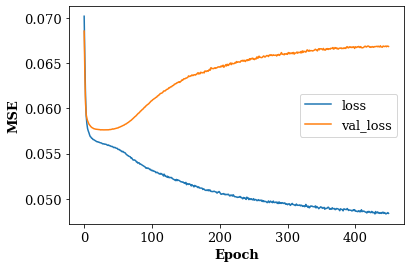

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import roc_curve
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams.update({'font.size': 13})
plt.rcParams['axes.labelweight'] = 'bold'
import time

plt.plot(history.history['loss'],label= 'loss')
plt.plot(history.history['val_loss'],label='val_loss')

plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.show()

### Predict

In [15]:

pred = autoencoder.predict(X_test)


print(pred.shape)


(1321, 61)


### back to dataframe

In [16]:
#print(SP_pr_ts['PC_enc'].head())

PC_enc_list = SP_pr_ts['PC_enc'].sort_values().tolist()
df_new = pd.DataFrame(data=pred, columns=SP_pr_ts.columns[1:])
PC_enc_list = SP_pr_ts['PC_enc'].sort_values().tolist()
df_new['PC_enc'] = PC_enc_list
df_new = df_new[['PC_enc']+ list(df_new.columns[0:-1])]
print(df_new.head())

#df_new = pd.concat([df_new, pd.DataFrame(data=pred, columns=SP_pr_ts.columns[1:])], axis=1)#.sort_values('PC_enc')

#print(df_new.head())

df_new.to_csv('evaluation/data/Model_ens_prov_id_pred.csv',index=False)




         PC_enc  F0_y_y   F1        F2   F3        F4        F5        F6  \
0  131023122942     0.0  0.0  0.157870  0.0  0.222532  0.276567  0.102942   
1  131023156693     0.0  0.0  0.155769  0.0  0.216320  0.269327  0.079737   
2  131023214462     0.0  0.0  0.177993  0.0  0.245764  0.296090  0.115659   
3  131023214801     0.0  0.0  0.162611  0.0  0.226331  0.285585  0.088167   
4  131023242322     0.0  0.0  0.159436  0.0  0.220113  0.259051  0.086809   

         F7   F8  ...  F51_y  F52_y  F53_y     F54_y  F55_y  F56_y  F57_y  \
0  0.050764  0.0  ...    0.0    0.0    0.0  0.005536    0.0    0.0    0.0   
1  0.073763  0.0  ...    0.0    0.0    0.0  0.010002    0.0    0.0    0.0   
2  0.065848  0.0  ...    0.0    0.0    0.0  0.000000    0.0    0.0    0.0   
3  0.075574  0.0  ...    0.0    0.0    0.0  0.010272    0.0    0.0    0.0   
4  0.078694  0.0  ...    0.0    0.0    0.0  0.014799    0.0    0.0    0.0   

   F58_y  F59_y  F60_y  
0    0.0    0.0    0.0  
1    0.0    0.0    0.0  

### Debug

In [182]:
i = 3
print(X_test[i,:10])
print(pred[i,:10])



[0 0 0 0 1 1 0 1 0 0]
[0.00296615 0.         0.         0.         0.9133584  1.0397264
 0.         0.9226485  0.         0.03729805]


In [195]:
eta = 0.2

np1 = X_test#.to_numpy()[:,1:]
np2 = pred#.to_numpy()[:,1:]

i = 12

print(np.where((np1[i,:]>eta).astype(int)))
print(np.where((np2[i,:]>eta).astype(int)))

print(np1[i,:])
print(np2[i,:])

#r = get_performance(df_test,df_model_ens_pred, 0.3)
#print(r)

#print(df_test.to_numpy()[i])
#print(df_model_ens_pred.to_numpy()[i])
#print()

(array([ 0,  1,  8, 15, 29, 39]),)
(array([ 0,  1,  8, 15, 29, 39]),)
[1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0.98706645 1.0094048  0.         0.         0.         0.
 0.         0.         1.0362589  0.         0.         0.
 0.         0.         0.         0.99164975 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.1063786
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.0002358  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [203]:
print(df_new.head())
print(SP_pr_ts.sort_values('PC_enc').head())

         PC_enc    F0_y_y       F1        F2   F3        F4        F5  \
0  131091501475  0.000000  0.00000  0.981716  0.0  0.000000  0.000000   
1  131214560515  0.000000  0.00000  0.000000  0.0  0.953292  0.000000   
2  131091028338  0.000000  0.00000  0.961141  0.0  0.000000  0.028484   
3  131090937788  0.002966  0.00000  0.000000  0.0  0.913358  1.039726   
4  131213181257  0.989081  1.00959  0.000000  0.0  0.000000  0.000000   

         F6        F7        F8  ...  F51_y  F52_y  F53_y  F54_y  F55_y  \
0  0.018934  0.000000  0.000000  ...    0.0    0.0    0.0    0.0    0.0   
1  0.938199  0.000000  0.000000  ...    0.0    0.0    0.0    0.0    0.0   
2  0.943942  0.000000  0.037403  ...    0.0    0.0    0.0    0.0    0.0   
3  0.000000  0.922648  0.000000  ...    0.0    0.0    0.0    0.0    0.0   
4  0.000000  0.000000  0.000000  ...    0.0    0.0    0.0    0.0    0.0   

   F56_y  F57_y  F58_y  F59_y  F60_y  
0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0   